# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file = "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import matplotlib.image as mpimg
import random

def split_by_class(y_data) :
    """
    Returns a dictionary whose keys are the class labels 
    and key values are list of indices with that class label.
    """
    img_index = {}
    labels = set(y_data)
    for i,y in enumerate(y_data) :
        if y not in img_index.keys() :
            img_index[y] = [i]
        else :
            img_index[y].append(i)
    return img_index
    

def display_sample_images(X_data, y_data, i_start='random') :
    """
    Displays images from each class, 
    i_start is the starting index in each class.
    By default, images are randomly chosen from each class
    """
    img_index = split_by_class(y_data)
    labels = list(set(y_data))[::-1]
    fig, axes = plt.subplots(3, 15, figsize=(15, 3))
    for ax in axes.flatten() :
        if labels : 
            i_img=0
            if i_start == 'random':
                i_img = random.choice(img_index[labels.pop()])  
            else : 
                i_img = img_index[labels.pop()][i_start]
            ax.imshow(X_train[i_img])
        ax.axis('off')

### Variation within each class
There seems to be a significant variation in lighting for randomly chosen images within a class. This is illustarted in two randomly chosen samples from each class :

**Random sample of images from each class**

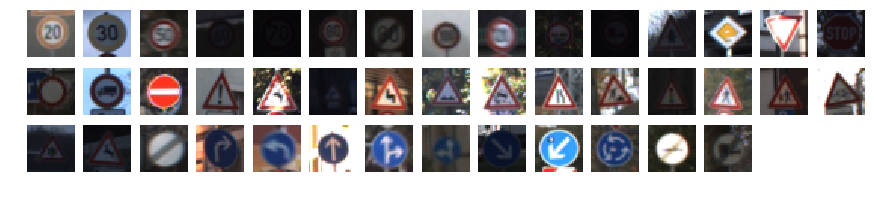

In [4]:
display_sample_images(X_train, y_train)

**Another random sample of images from each class**

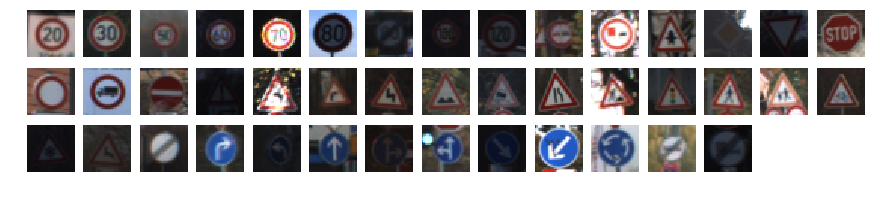

In [5]:
display_sample_images(X_train, y_train)

## Similarity in sequential images in training set
There seems to be similarity in sequential images probably because images were captured in close interval from the same vehicle. This is illustrated by two consecutive images (2nd and 3rd) taken from each class 

**1st image from each class**

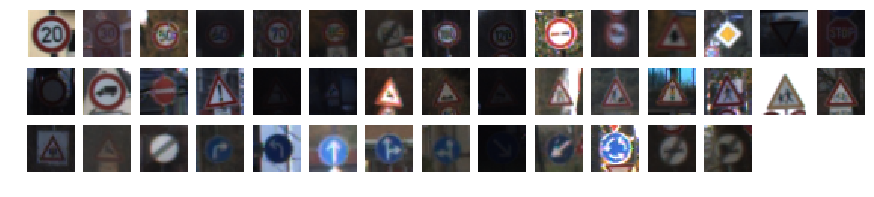

In [6]:
display_sample_images(X_train, y_train, i_start=0)

**2nd image from each class**

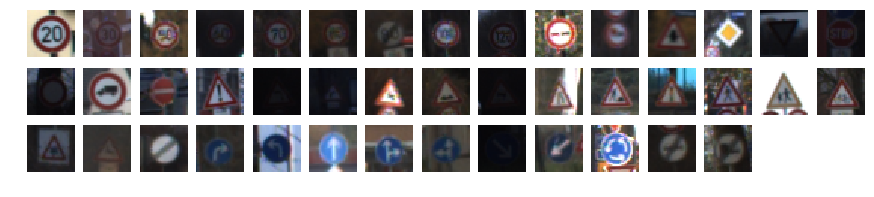

In [7]:
display_sample_images(X_train, y_train, i_start=1)

**3rd image from each class**

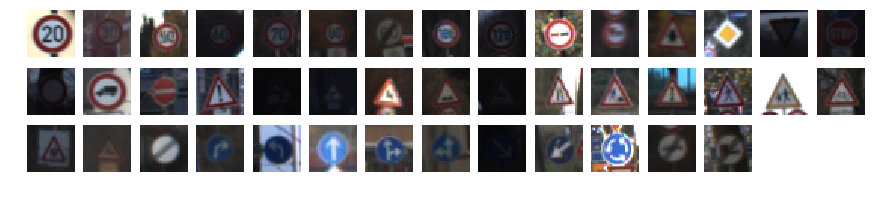

In [8]:
display_sample_images(X_train, y_train, i_start=2)

Here are the first 15 images from 5 class, clearly they look very similar

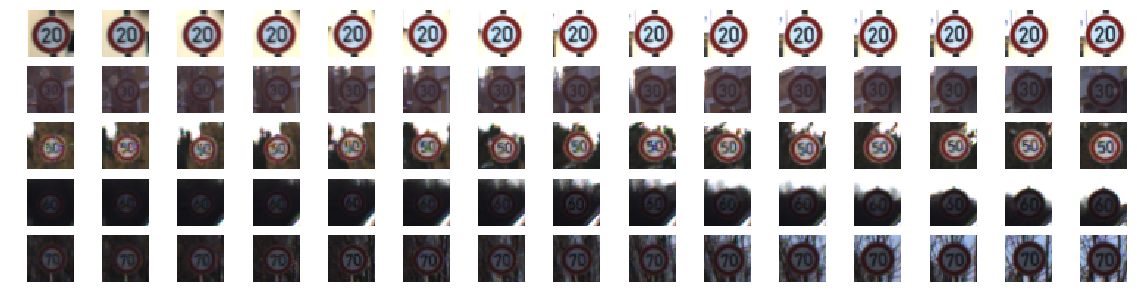

In [9]:
img_index = split_by_class(y_train)
fig, ax = plt.subplots(5,15, figsize=(20,5))
for label in range(5) :
    for i in range(15) :
        ax[label, i].imshow(X_train[img_index[label][i]])
        ax[label, i].axis('off')

## Grouping images by 'tracks'
Below we define a similarity index for two images and observe that many of the images are very similar. As explained above, this similarity arises because pictures were taken from the same vehicle at close intervals. We define such a group of images as a 'track' and we want to identify images which belong to the same track. This will be crucial because CNN trained on images in the same track will not be robust to new data. Further care has to be taken when we divide the data set into training and validation sets. 

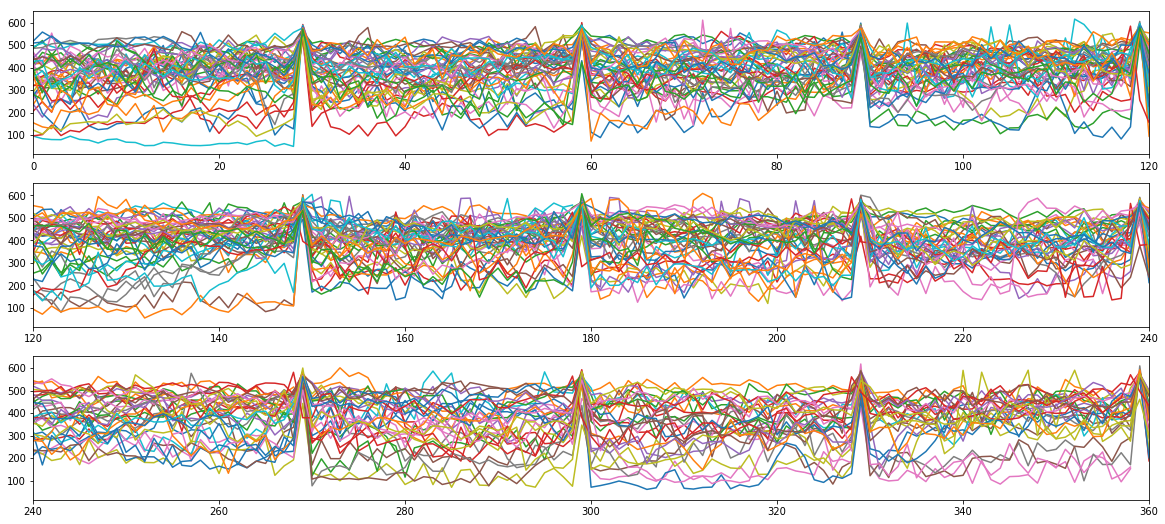

In [10]:
import numpy as np 
import cv2

def similarity_index(image1, image2) :
    """
    Determines how similar or different images are.
    A small value indicates very similar images. 
    """
    return (np.sum(np.square(image1.flatten()-image2.flatten())))**.5

def display_image_similarity(X_data,y_data, nrows=3) :
    img_index = split_by_class(y_data)
    fig, axes = plt.subplots(nrows, 1, figsize=(20,3*nrows))
    for i,ax in enumerate(axes) :
        ax.set_xlim([i*120, (i+1)*120])
    for label in range(n_classes) :
        sim = []
        for i in range(1, len(img_index[label])) :
            sim.append(similarity_index(X_data[img_index[label][i]], X_data[img_index[label][i-1]]))
        for ax in axes :
            ax.plot(sim)
        
display_image_similarity(X_train,y_train)

The spikes clearly visible in the above dataset mark separation of tracks at intervals of 30 images. 
We will use this information later to divide the dataset into training and test tests.  

**In the test set, no such similarity is observed between consecutive images :**

Also, note that similarity index is much higher on average meaning the consecutive images are very different

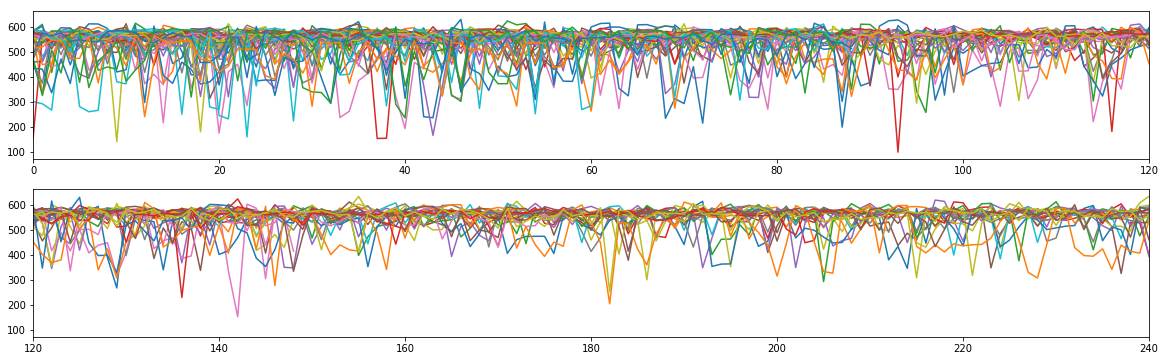

In [11]:
display_image_similarity(X_test,y_test, nrows=2)

## Distribution of images in the classes
The dataset seems to be imbalanced as illustrated below.

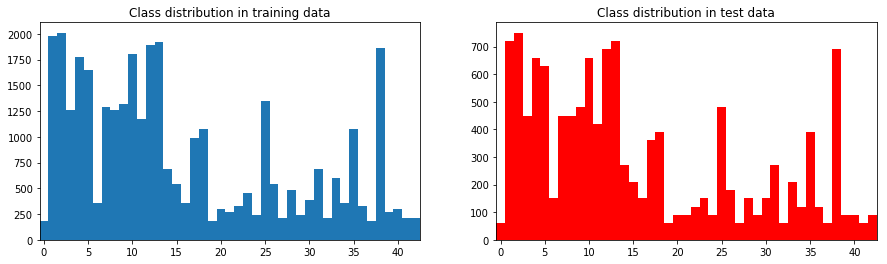

In [12]:
def plot_dist(y_data, title=None, ax=None, **kwargs) :
    if not ax :
        fig = plt.figure()
        ax = fig.add_subplot(111)
    ax.hist(y_data, np.arange(-0.5, n_classes+1.5), stacked=True, **kwargs)
    ax.set_xlim(-0.5,n_classes-0.5)
    if 'label' in kwargs : ax.legend()
    if title : ax.set_title(title)

fig,ax = plt.subplots(1,2, figsize=(15,4))
plot_dist(y_train, title='Class distribution in training data', ax=ax[0])
plot_dist(y_test, title='Class distribution in test data', ax=ax[1], color='red')

The class ditribution in train and test sets look very similar. Even if we did not balance dataset, it is possible to obtain a reasonable accuracy for this particular testset. However, for new test sets with different class distributions, accuracy will go down. Therefore, we will balance our training set later by data augmentation.

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

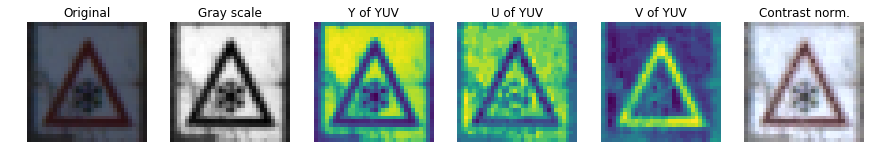

In [13]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import random
from sklearn.utils import shuffle

def MinMaxNorm(image, a=-.5, b=.5) :
    Xmin, Xmax = np.min(image), np.max(image)
    return (image-Xmin)*(b-a)/(Xmax-Xmin)

def AbsNorm(image, a=-.5, b=0.5, col_min=0, col_max=255) :
    return (image-col_min)*(b-a)/(col_max-col_min)

def grayscale_norm(image) :
    # convert to grayscale 
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return MinMaxNorm(img)

def YUV_norm(image) :
    # convert to YUV color space
    new_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    # normalize the Y channel
    [y,u,v] = [new_image[:,:,i] for i in range(3)]
    new_image = np.zeros(image.shape)
    new_image[:,:,0] = MinMaxNorm(y)
    new_image[:,:,1],new_image[:,:,2] = AbsNorm(u), AbsNorm(v)
    return new_image

def contrast_norm(image) :
    # convert to  lab colorspace
    lab= cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    # apply adative histogram equalization 
    l = lab[:,:,0]
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(4,4))
    cl = clahe.apply(l)
    lab[:,:,0] = cl
    # convert back to RGB and scale values 
    img =  cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    new_img = np.zeros(image.shape)
    for i in range(3) :
        new_img[:,:,i] = AbsNorm(img[:,:,i])
    return new_img

img_index = split_by_class(y_train)
img = X_train[img_index[30][20]]
fig, ax = plt.subplots(1,6, figsize=(15,3))
for axes in ax :
    axes.axis('off')
# original image
ax[0].imshow(img)
ax[0].set_title('Original')
# grayscale normalized 
ax[1].imshow(grayscale_norm(img), cmap='gray')
ax[1].set_title('Gray scale')
# YUV normalized (Y channel) 
ax[2].imshow(YUV_norm(img)[:,:,0])
ax[2].set_title('Y of YUV')
# YUV normalized (U channel) 
ax[3].imshow(YUV_norm(img)[:,:,1])
ax[3].set_title('U of YUV')
# YUV normalized (V channel) 
ax[4].imshow(YUV_norm(img)[:,:,2])
ax[4].set_title('V of YUV')
# Contrast normalized 
ax[5].imshow(contrast_norm(img))
ax[5].set_title('Contrast norm.')

### First stand out idea (Augment data)

### Why I prefered to split training data rather than using the provided validation data?

Due to a memory issue appeared while training which is as following:

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/utils/__init__.py in safe_indexing(X, indices)
    108                                    indices.dtype.kind == 'i'):
    109             # This is often substantially faster than X[indices]
--> 110             return X.take(indices, axis=0)
    111         else:
    112             return X[indices]

MemoryError:

This issue is solved by splitting training and validation data.



New training data shape is :  (33509, 32, 32, 3)
Validation data shape is :  (1290, 32, 32, 3)


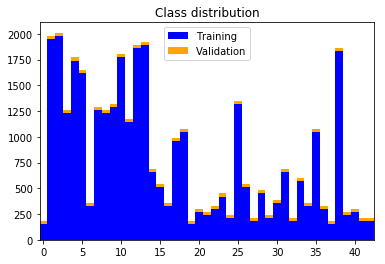

In [14]:
def split_train_validation(X_data, y_data) :
    """
    Splits data into training and validations sets based on tracks
    such that all images from a track are confined to either training 
    or validation sets but not both.
    """
    X_train_new, y_train_new = [],[]
    X_validation, y_validation = [], []
    
    n_per_track = 30 # images per track
    img_index = split_by_class(y_data)
    for label in range(n_classes) : 
        indices = img_index[label]
        n_tracks = round(len(indices)/n_per_track) # number of tracks for this label
        X_list = np.array_split(X_data[indices[0]:indices[-1]+1], n_tracks)
        y_list = np.array_split(y_data[indices[0]:indices[-1]+1], n_tracks)
        X_list,y_list = shuffle(X_list,y_list, random_state=0)
        X_validation += X_list[:1]
        y_validation += y_list[:1]
        X_train_new += X_list[1:]
        y_train_new += y_list[1:]
        
    return (np.concatenate(X_train_new), np.concatenate(y_train_new), 
            np.concatenate(X_validation), np.concatenate(y_validation))

# sanity check
X_train_new, y_train_new, X_validation, y_validation = split_train_validation(X_train, y_train)
print("New training data shape is : ", X_train_new.shape)
print("Validation data shape is : ", X_validation.shape)
plot_dist([y_train_new, y_validation], title='Class distribution', 
          label=['Training','Validation'], color=['blue','orange'])

Next, we need to generate fake data for several reasons : 
* To balance our dataset
* For training purposes, ideally we should have had lot of tracks and only a few images per track but this is not the case. 
* In general, small perturbations in our original dataset will increase robustness of CNNs later.

We will generate fake data by performing geometric transformations. Some useful functions for these transformations are defined below :

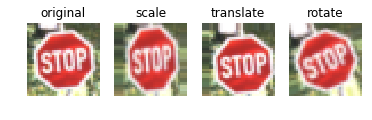

In [15]:
# geometric transformations

# scaling
def scale(img, x_scale=0.85, y_scale=1.15) :
    r,c = img.shape[:-1]
    scaled_img = cv2.resize(img,None,fx=x_scale,fy=y_scale)
    new_img = cv2.copyMakeBorder(scaled_img,5,5,5,5,cv2.BORDER_REPLICATE)
    rows,cols = new_img.shape[:-1]
    r0,c0 = round((rows-r)/2), round((cols-c)/2)
    return new_img[r0:r0+r, c0:c0+c]
    
# translation
def translate(img, delta_x=2, delta_y=-2):
    r,c = img.shape[:-1]
    new_img = cv2.copyMakeBorder(img,5,5,5,5,cv2.BORDER_REPLICATE)
    rows,cols = new_img.shape[:-1]
    r0,c0 = round((rows-r)/2)+delta_y, round((cols-c)/2)-delta_x
    return new_img[r0:r0+r, c0:c0+c]

# rotation
def rotate(img, theta=18):
    r,c = img.shape[:-1]
    new_img = cv2.copyMakeBorder(img,5,5,5,5,cv2.BORDER_REPLICATE)
    rows,cols = new_img.shape[:-1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),theta,1)
    new_img = cv2.warpAffine(new_img,M,(cols,rows))
    r0,c0 = round((rows-r)/2), round((cols-c)/2)
    return new_img[r0:r0+r, c0:c0+c]

# check if the transformations work
img = X_train[img_index[14][200]]
def original(img) : return img
fig, ax = plt.subplots(1,4, figsize=(6,2))
for i,transform in enumerate([original, scale, translate, rotate]) :
    ax[i].imshow(transform(img))
    ax[i].axis('off')
    ax[i].set_title(transform.__name__)

Following code randomizes and combines the above image transformations

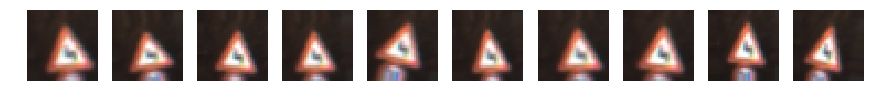

In [16]:
# implement random transforms
random_scale = lambda img : scale(img, x_scale=random.uniform(0.85,1.1), y_scale=random.uniform(0.85,1.1))
random_translate = lambda img : translate(img, delta_x=random.randint(-2,2), delta_y=random.randint(-2,2))
random_rotate = lambda img : rotate(img, theta=random.uniform(-17.,17.))

def random_transform(img) :
    new_img = img
    transform_list = [random_scale, random_translate, random_rotate]
    random.shuffle(transform_list)
    for transform in transform_list :
        new_img = transform(new_img)
    return new_img

# check
img = X_train[img_index[21][10]]
fig, ax = plt.subplots(1,10, figsize=(15,2))
for i in range(10) :
    ax[i].imshow(random_transform(img))
    ax[i].axis('off')

As already explained, we have a problem that most consecutive images are strongly correlated because they belong to the same track. To fix this problem, we apply random image transforms to every odd numbered image in training dataset with the idea being that consecutive images have similar resolution. Further, we augment existing dataset to make it balanced by requiring 3000 examples per class in training set.  

In [17]:
from tqdm import tqdm

def perturb_data(X_data, y_data):
    """
    splits dataset retaining half the original images 
    while perturbing the other half of the images 
    """
    X_old, y_old = [], []
    X_new, y_new = [], []
    images_pbar = tqdm(X_data, unit='images', desc='Original data perturbation')
    for i,img in enumerate(images_pbar) :
        if i%2 == 0 : 
            X_old.append(img) 
            y_old.append(y_data[i])
        else :
            X_new.append(random_transform(img))
            y_new.append(y_data[i])
    return (np.array(X_old), np.array(y_old), 
            np.array(X_new), np.array(y_new))
        

def augment_data(X_data, y_data, n=300):
    """
    augments dataset so that there are n images per class
    """
    X_data_fake, y_data_fake = [],[]
    img_index = split_by_class(y_data)
    labels_pbar = tqdm(range(n_classes), unit='class', desc='Data augmentation')
    for label in labels_pbar:
        n_fake = n-len(img_index[label])
        if n_fake <= 0 : continue
        for i in range(n_fake):
            i_img = random.choice(img_index[label])
            img = X_data[i_img]
            X_data_fake.append(random_transform(img))
            y_data_fake.append(label)
    return np.array(X_data_fake),np.array(y_data_fake)

In [18]:
# generate training data with 5000 images per class
from time import sleep
print('Training dataset augmentation')
sleep(1)
X_train_given, y_train_given, X_train_pert, y_train_pert = perturb_data(X_train_new, y_train_new)
X_train_fake, y_train_fake = augment_data(X_train_new, y_train_new, n=5000)
del X_train_new, y_train_new

Training dataset augmentation


Data augmentation: 100%|██████████| 43/43 [00:22<00:00,  1.76class/s]


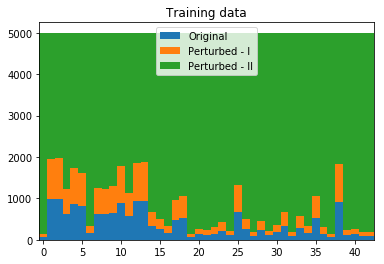

In [19]:
# check if distributions are as expected
plot_dist([y_train_given,y_train_pert, y_train_fake], title='Training data', \
          label=['Original','Perturbed - I','Perturbed - II'])

In [20]:
from sklearn.utils import shuffle
from time import sleep 

# combine training data, shuffle and apply pre-processing 
print('Preparing training data...')
X_train = np.concatenate((X_train_given, X_train_pert, X_train_fake))
y_train = np.concatenate((y_train_given, y_train_pert, y_train_fake))
X_train, y_train = shuffle(X_train, y_train)
del X_train_given, X_train_pert, X_train_fake, \
    y_train_given, y_train_pert, y_train_fake # free memory 
sleep(1)
images_pbar = tqdm(X_train, unit='images')
X_train = np.zeros(X_train.shape)
for i,img in enumerate(images_pbar) : 
    X_train[i] = contrast_norm(img) 
print('Done')

# combine validation data, shuffle and apply pre-processing 
print('Preparing validation data...')
X_validation, y_validation = shuffle(X_validation, y_validation)
sleep(1)
images_pbar = tqdm(X_validation, unit='images')
X_validation = np.zeros(X_validation.shape)
for i,img in enumerate(images_pbar) : 
    X_validation[i] = contrast_norm(img) 
print('Done')
    
# pre-process test set images
print('Preparing test data...')
sleep(1)
images_pbar = tqdm(X_test, unit='images')
X_test = np.zeros(X_test.shape)
for i,img in enumerate(images_pbar) : 
    X_test[i] = contrast_norm(img) 
sleep(1)

Preparing training data...


100%|██████████| 215000/215000 [00:53<00:00, 3985.71images/s]


Done
Preparing validation data...


100%|██████████| 1290/1290 [00:00<00:00, 3752.91images/s]


Done
Preparing test data...


100%|██████████| 12630/12630 [00:03<00:00, 3981.76images/s]


Training data shape :  (215000, 32, 32, 3)
Validation data shape :  (1290, 32, 32, 3)
Test data shape :  (12630, 32, 32, 3)


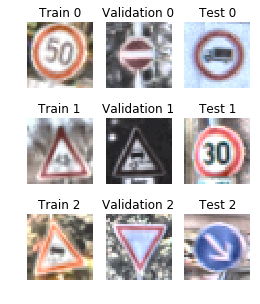

In [21]:
# sanity check : training, validation and test sets 
fig, ax = plt.subplots(3,3, figsize=(4,5))
for i in range(3) :
    ax[i,0].imshow(X_train[i])
    ax[i,0].set_title('Train '+str(i))
    ax[i,1].imshow(X_validation[i])
    ax[i,1].set_title('Validation '+str(i))
    ax[i,2].imshow(X_test[i])
    ax[i,2].set_title('Test '+str(i))
for axes in ax.flatten() :
    axes.axis('off')

print('Training data shape : ', X_train.shape)
print('Validation data shape : ', X_validation.shape)
print('Test data shape : ', X_test.shape)

### Model Architecture

**Answer:** 

The model I have chosen is inspired by VGGnet architecture. Consider the following arrangement : 
* Conv. layer  
* ReLu activation
* Conv. layer 
* ReLu activation
* Pooling
* Dropout  

This arrangement is repeated 3 times so that we have a total of 6 conv layers. These layers have 32, 32, 64, 64, 128 and 128 filters in that order. Each conv. layer uses 3x3 filters with stride=1 and padding=1. Pooling layer uses maxpool filters of size 2x2 with stride=2. 
This is followed by following arrangement : 
* Full-connected layer
* ReLu activation
* Dropout  

repeated twice. Each fully-connected layers has size of 128. Softmax function is applied on final output layer for computing loss. 

In [22]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import os

DIR = 'models'
if not os.path.exists(DIR) :
    os.makedirs(DIR)

In [23]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

keep_prob = tf.placeholder(tf.float32) # for fully-connected layers
keep_prob_conv = tf.placeholder(tf.float32) # for convolutional layers
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

class VGGnet :  

    def __init__(self, n_out=43, mu=0, sigma=0.1, learning_rate=0.0007) :
        # Hyperparameters
        self.mu = mu
        self.sigma = sigma

        # Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x32.
        self.conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 32), mean = self.mu, stddev = self.sigma))
        self.conv1_b = tf.Variable(tf.zeros(32))
        self.conv1   = tf.nn.conv2d(x, self.conv1_W, strides=[1, 1, 1, 1], padding='SAME') + self.conv1_b

        # ReLu Activation.
        self.conv1 = tf.nn.relu(self.conv1)

        # Layer 2: Convolutional. Input = 32x32x32. Output = 32x32x32.
        self.conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 32), mean = self.mu, stddev = self.sigma))
        self.conv2_b = tf.Variable(tf.zeros(32))
        self.conv2   = tf.nn.conv2d(self.conv1, self.conv2_W, strides=[1, 1, 1, 1], padding='SAME') + self.conv2_b

        # ReLu Activation.
        self.conv2 = tf.nn.relu(self.conv2)

        # Pooling. Input = 32x32x32. Output = 16x16x32.
        self.conv2 = tf.nn.max_pool(self.conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        self.conv2 = tf.nn.dropout(self.conv2, keep_prob_conv) # dropout

        # Layer 3: Convolutional. Input = 16x16x32. Output = 16x16x64.
        self.conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean = self.mu, stddev = self.sigma))
        self.conv3_b = tf.Variable(tf.zeros(64))
        self.conv3   = tf.nn.conv2d(self.conv2, self.conv3_W, strides=[1, 1, 1, 1], padding='SAME') + self.conv3_b

        # ReLu Activation.
        self.conv3 = tf.nn.relu(self.conv3)

        # Layer 4: Convolutional. Input = 16x16x32. Output = 16x16x64.
        self.conv4_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 64), mean = self.mu, stddev = self.sigma))
        self.conv4_b = tf.Variable(tf.zeros(64))
        self.conv4   = tf.nn.conv2d(self.conv3, self.conv4_W, strides=[1, 1, 1, 1], padding='SAME') + self.conv4_b

        # ReLu Activation.
        self.conv4 = tf.nn.relu(self.conv4)

        # Pooling. Input = 16x16x64. Output = 8x8x64.
        self.conv4 = tf.nn.max_pool(self.conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        self.conv4 = tf.nn.dropout(self.conv4, keep_prob_conv) # dropout

        # Layer 5: Convolutional. Input = 8x8x64. Output = 8x8x128.
        self.conv5_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = self.mu, stddev = self.sigma))
        self.conv5_b = tf.Variable(tf.zeros(128))
        self.conv5   = tf.nn.conv2d(self.conv4, self.conv5_W, strides=[1, 1, 1, 1], padding='SAME') + self.conv5_b

        # ReLu Activation.
        self.conv5 = tf.nn.relu(self.conv5)

        # Layer 6: Convolutional. Input = 8x8x128. Output = 8x8x128.
        self.conv6_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 128, 128), mean = self.mu, stddev = self.sigma))
        self.conv6_b = tf.Variable(tf.zeros(128))
        self.conv6   = tf.nn.conv2d(self.conv5, self.conv6_W, strides=[1, 1, 1, 1], padding='SAME') + self.conv6_b

        # ReLu Activation.
        self.conv6 = tf.nn.relu(self.conv6)

        # Pooling. Input = 8x8x128. Output = 4x4x128.
        self.conv6 = tf.nn.max_pool(self.conv6, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        self.conv6 = tf.nn.dropout(self.conv6, keep_prob_conv) # dropout

        # Flatten. Input = 4x4x128. Output = 2048.
        self.fc0   = flatten(self.conv6)

        # Layer 7: Fully Connected. Input = 2048. Output = 128.
        self.fc1_W = tf.Variable(tf.truncated_normal(shape=(2048, 128), mean = self.mu, stddev = self.sigma))
        self.fc1_b = tf.Variable(tf.zeros(128))
        self.fc1   = tf.matmul(self.fc0, self.fc1_W) + self.fc1_b

        # ReLu Activation.
        self.fc1    = tf.nn.relu(self.fc1)
        self.fc1    = tf.nn.dropout(self.fc1, keep_prob) # dropout

        # Layer 8: Fully Connected. Input = 128. Output = 128.
        self.fc2_W  = tf.Variable(tf.truncated_normal(shape=(128, 128), mean = self.mu, stddev = self.sigma))
        self.fc2_b  = tf.Variable(tf.zeros(128))
        self.fc2    = tf.matmul(self.fc1, self.fc2_W) + self.fc2_b

        # ReLu Activation.
        self.fc2    = tf.nn.relu(self.fc2)
        self.fc2    = tf.nn.dropout(self.fc2, keep_prob) # dropout

        # Layer 9: Fully Connected. Input = 128. Output = n_out.
        self.fc3_W  = tf.Variable(tf.truncated_normal(shape=(128, n_out), mean = self.mu, stddev = self.sigma))
        self.fc3_b  = tf.Variable(tf.zeros(n_out))
        self.logits = tf.matmul(self.fc2, self.fc3_W) + self.fc3_b

        # training operation
        self.one_hot_y = tf.one_hot(y, n_out)
        self.cross_entropy = tf.nn.softmax_cross_entropy_with_logits(self.logits, self.one_hot_y)
        self.loss_operation = tf.reduce_mean(self.cross_entropy)
        self.optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
        self.training_operation = self.optimizer.minimize(self.loss_operation)

        # accuracy 
        self.correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.one_hot_y, 1))
        self.accuracy_operation = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))

        # save all variables
        self.saver = tf.train.Saver()
    
    def y_predict(self, X_data, BATCH_SIZE=64) :
        num_examples = len(X_data)
        y_pred = np.zeros(num_examples, dtype=np.int32)
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x = X_data[offset:offset+BATCH_SIZE]
            y_pred[offset:offset+BATCH_SIZE] = sess.run(tf.argmax(self.logits, 1), 
                               feed_dict={x:batch_x, keep_prob:1, keep_prob_conv:1})
        return y_pred
    
    def evaluate(self, X_data, y_data, BATCH_SIZE=64):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            accuracy = sess.run(self.accuracy_operation, 
                                feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0, keep_prob_conv: 1.0 })
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [24]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# train model 1
EPOCHS = 30
BATCH_SIZE = 64
model_1 = VGGnet(n_out = n_classes)
model_name = "model_1"


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(y_train)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(model_1.training_operation, 
            feed_dict={x: batch_x, y: batch_y, keep_prob : 0.5, keep_prob_conv: 0.7})

        validation_accuracy = model_1.evaluate(X_validation, y_validation)
        print("EPOCH {} : Validation Accuracy = {:.3f}".format(i+1, validation_accuracy))

    model_1.saver.save(sess, os.path.join(DIR,model_name))
    print("Model saved")

Training...

EPOCH 1 : Validation Accuracy = 0.464
EPOCH 2 : Validation Accuracy = 0.888
EPOCH 3 : Validation Accuracy = 0.969
EPOCH 4 : Validation Accuracy = 0.981
EPOCH 5 : Validation Accuracy = 0.980
EPOCH 6 : Validation Accuracy = 0.988
EPOCH 7 : Validation Accuracy = 0.988
EPOCH 8 : Validation Accuracy = 0.991
EPOCH 9 : Validation Accuracy = 0.995
EPOCH 10 : Validation Accuracy = 0.989
EPOCH 11 : Validation Accuracy = 0.995
EPOCH 12 : Validation Accuracy = 0.993
EPOCH 13 : Validation Accuracy = 0.994
EPOCH 14 : Validation Accuracy = 0.991
EPOCH 15 : Validation Accuracy = 0.988
EPOCH 16 : Validation Accuracy = 0.996
EPOCH 17 : Validation Accuracy = 0.990
EPOCH 18 : Validation Accuracy = 0.991
EPOCH 19 : Validation Accuracy = 0.995
EPOCH 20 : Validation Accuracy = 0.995
EPOCH 21 : Validation Accuracy = 0.993
EPOCH 22 : Validation Accuracy = 0.996
EPOCH 23 : Validation Accuracy = 0.995
EPOCH 24 : Validation Accuracy = 0.992
EPOCH 25 : Validation Accuracy = 0.995
EPOCH 26 : Validation

In [25]:
# test model 1

with tf.Session() as sess:
    model_1.saver.restore(sess, os.path.join(DIR, "model_1"))
    #test_accuracy = model_1.evaluate(X_test, y_test)
    y_pred = model_1.y_predict(X_test)
    test_accuracy = sum(y_test == y_pred)/len(y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.981


### Test accuracy = 98.1% !!
It is quite remarkable that VGGnet inspired CNN with only minor tweaks yields such a high test  accuracy. 

Let us now plot the confusion matrix to see where the model actually fails. Note that we plot the log of confusion matrix due to very high accuracy.

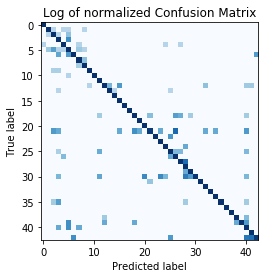

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm = np.log(.0001+cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Log of normalized Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

We observe some clusters in the confusion matrix above. It turns out that the various speed limits are sometimes misclassified among themselves. Similarly, traffic signs with traingular shape are misclassified among themselves. We can further improve on the model using hierarchical CNNs to first identify broader groups like speed signs and then have CNNs to classify finer features such as the actual speed limit.   

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [27]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import pandas as pd
sign_names = pd.read_csv('signnames.csv')
sign_names.head(10)

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


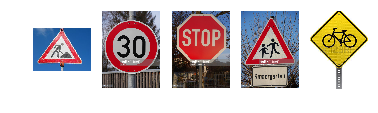

In [28]:
import glob
img_files = glob.glob('test_images/*.jpg')
n_new = len(img_files)
new_data = np.zeros((n_new, 32,32,3), dtype=np.uint8)
fig, ax = plt.subplots(1,n_new)
for i in range(n_new) :
    img = plt.imread(img_files[i])
    ax[i].imshow(img)
    ax[i].axis('off')
    img = cv2.resize(img, (32,32), interpolation=cv2.INTER_AREA) # resize to 32x32
    new_data[i] = img

### Predict the Sign Type for Each Image

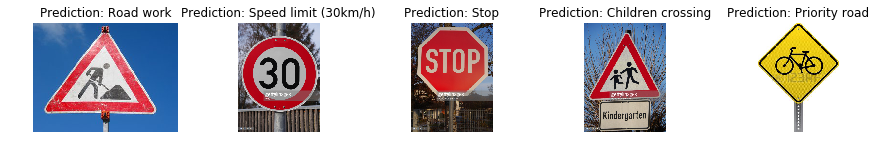

In [29]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

def y_predict_model(X_data, top_k=1):
    num_examples = len(X_data)
    y_pred = np.zeros((num_examples, top_k), dtype=np.int32)
    y_prob = np.zeros((num_examples, top_k))
    with tf.Session() as sess:
        model_1.saver.restore(sess, os.path.join(DIR, "model_1"))
        y_prob, y_pred = sess.run(tf.nn.top_k(tf.nn.softmax(model_1.logits), k=top_k), 
                             feed_dict={x:X_data, keep_prob:1, keep_prob_conv:1})
    return y_prob,y_pred


# preprocess data  :
new_data_proc = np.zeros(new_data.shape)
for i in range(n_new):
    new_data_proc[i] = contrast_norm(new_data[i])
    
# make predictions
_, y_pred = y_predict_model(new_data_proc)

# show the prediction results
fig, ax = plt.subplots(1,n_new, figsize=(15,2))
for i in range(n_new) :
    img = plt.imread(img_files[i])
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title('Prediction: '+sign_names.iloc[y_pred[i][0]]['SignName'])

### Analyze Performance

### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

I get an accuracy of 80% on the new dataset. This is actually better that what I had anticipated, my classifier worked even on bicycles crossing sign which looked very different from the German sign.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [30]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

def print_probs(X_data) :
    n_examples = len(X_data)
    #fig, ax = plt.subplots(n_examples, 2,figsize=(10,8))
    
    X_data_proc = np.zeros(X_data.shape)
    for i in range(n_examples):
        X_data_proc[i] = contrast_norm(X_data[i])
        num_examples = len(X_data)
        pred = np.zeros((num_examples, 5), dtype=np.int32)
        prob = np.zeros((num_examples, 5))
        with tf.Session() as sess:
            model_1.saver.restore(sess, os.path.join(DIR, "model_1"))
            prob, pred = sess.run(tf.nn.top_k(tf.nn.softmax(model_1.logits), k=5), feed_dict={x:X_data, keep_prob:1, keep_prob_conv:1})
    #prob, pred = y_predict_model(X_data_proc, top_k=5)
    
    for i in range(n_examples):
        labels = prob[i]
        print("Image {0}, Top 5 Probabilities: {1}".format(i, labels))

print_probs(new_data)

Image 0, Top 5 Probabilities: [ 1.  0.  0.  0.  0.]
Image 1, Top 5 Probabilities: [ 1.  0.  0.  0.  0.]
Image 2, Top 5 Probabilities: [ 1.  0.  0.  0.  0.]
Image 3, Top 5 Probabilities: [ 1.  0.  0.  0.  0.]
Image 4, Top 5 Probabilities: [ 1.  0.  0.  0.  0.]


### Standout idea (Create Visualizations of the Softmax Probabilities)

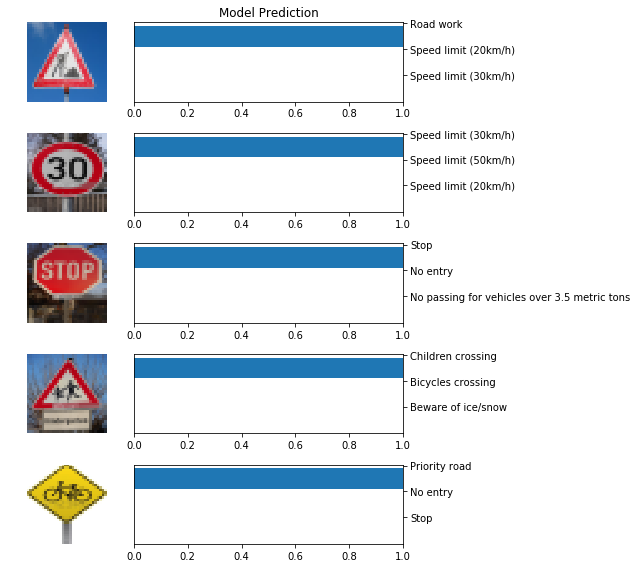

In [31]:
# Here, I will visualize softmax probabilities

def visualize_models(X_data) :
    n_examples = len(X_data)
    fig, ax = plt.subplots(n_examples, 2,figsize=(10,8))
    
    X_data_proc = np.zeros(X_data.shape)
    for i in range(n_examples):
        X_data_proc[i] = contrast_norm(X_data[i])
    prob, pred = y_predict_model(X_data_proc, top_k=3)
    
    for i in range(n_examples):
        labels = pred[i]
        names = [sign_names.iloc[l]['SignName'] for l in labels]
        bar_locations = np.arange(3)[::-1]
        ax[i,0].imshow(X_data[i])
        ax[i,0].axis('off')
        ax[i,1].barh(bar_locations, prob[i])
        ax[i,1].set_yticks(0.5+bar_locations)
        ax[i,1].set_yticklabels(names)
        ax[i,1].yaxis.tick_right()
        ax[i,1].set_xlim([0,1])
    ax[0,1].set_title('Model Prediction')
    fig.tight_layout()
    
visualize_models(new_data)

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 